## Data analysis

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Load the data
data_path = 'Duke.csv'  
df = pd.read_csv(data_path)

relevant_columns = ['N', 'I', 'J', 'K', 'L', 'O']
selected_data = df.iloc[:, [13, 8, 9, 10, 11, 14]]  # Columns for Y1, Z1, Z2, Z3, Z4, Y2
selected_data.columns = ['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Y2']  # Rename for clarity

print(selected_data.head())

     Y1  Z1   Z2  Z3   Z4    Y2
0  5.49   4  0.0   0  100  5.99
1  5.49   4  0.0   0  100  5.99
2  5.49   4  0.0   0  100  5.99
3  5.49   4  0.0   0  100  5.99
4  5.49   4  0.0   0  100  5.99


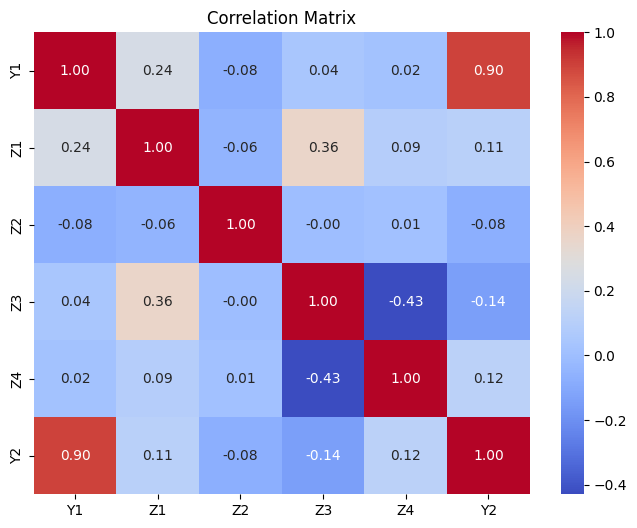

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

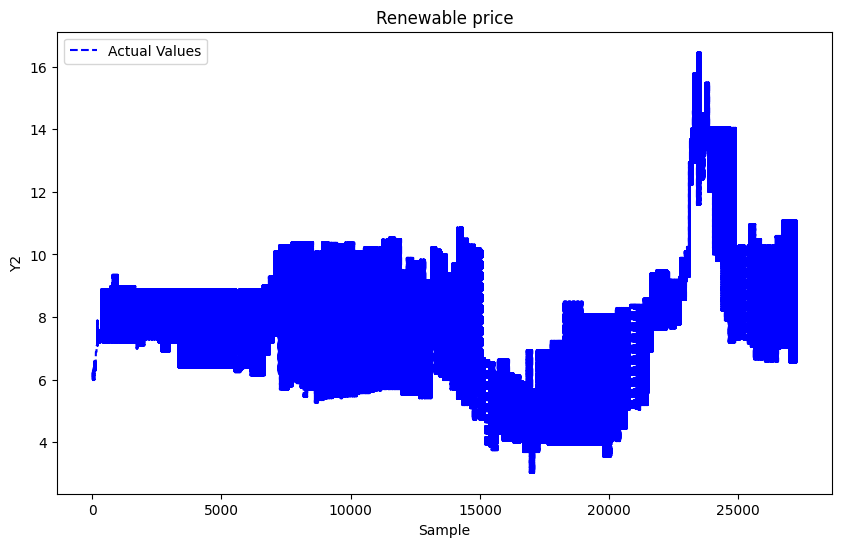

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(selected_data['Y2'], label="Actual Values", linestyle='dashed', color='blue')
plt.title("Renewable price")
plt.xlabel("Sample")
plt.ylabel("Y2")
plt.legend()
plt.show()

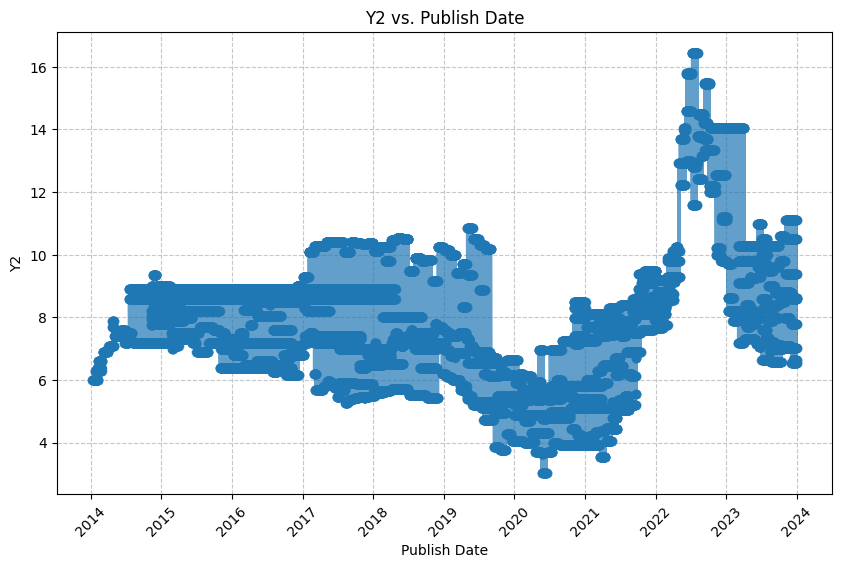

In [16]:
import matplotlib.pyplot as plt

# Convert PublishDate to datetime format
df["PublishDate"] = pd.to_datetime(df["PublishDate"])

# Check if 'Y2' exists in the dataframe
if "Y2" in df.columns:
    # Plot Y2 vs. PublishDate
    plt.figure(figsize=(10, 6))
    plt.plot(df["PublishDate"], df["Y2"], marker='o', linestyle='-', alpha=0.7)
    plt.xlabel("Publish Date")
    plt.ylabel("Y2")
    plt.title("Y2 vs. Publish Date")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'Y2' not found in the dataset.")


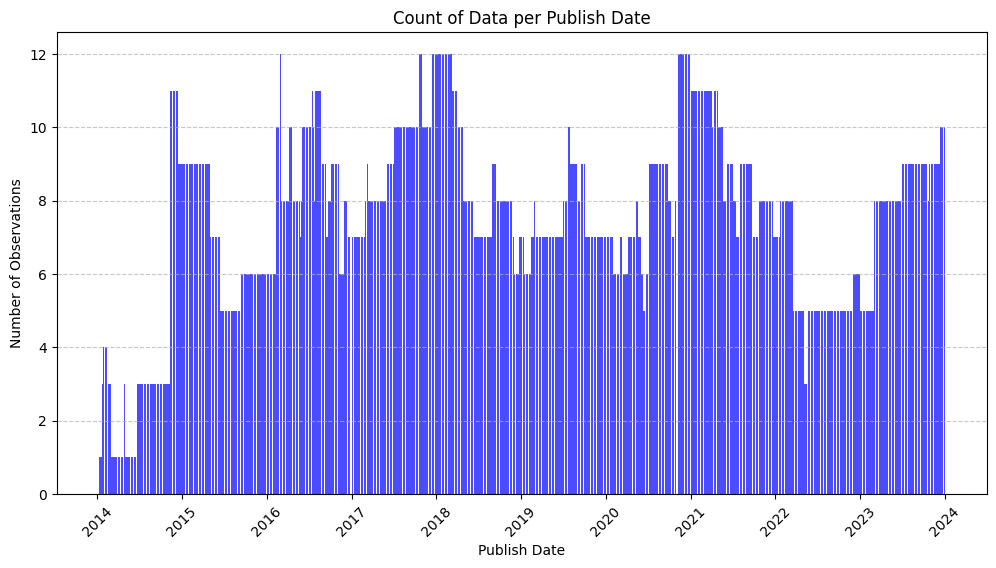

In [11]:
# Convert PublishDate to datetime format
df['PublishDate'] = pd.to_datetime(df['PublishDate'])

# Count the number of observations per PublishDate
data_counts = df.groupby('PublishDate').size()

# Plot the count of data for each PublishDate
plt.figure(figsize=(12, 6))
plt.bar(data_counts.index, data_counts.values, color='blue', alpha=0.7)

plt.xlabel('Publish Date')
plt.ylabel('Number of Observations')
plt.title('Count of Data per Publish Date')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate Variance Inflation Factor (VIF)
X_for_vif = selected_data[['Y1', 'Z1', 'Z2', 'Z3', 'Z4']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i) for i in range(X_for_vif.shape[1])]

vif_data


,Feature,VIF
0,Y1,12.710799
1,Z1,6.000805
2,Z2,1.009335
3,Z3,2.785995
4,Z4,11.395047


## LSTM

C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_4296\1870463058.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Month'] = selected_data.index.month
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_4296\1870463058.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Day'] = selected_data.index.day
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_4296\1870463058.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Epoch 1/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0211
Epoch 2/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0033
Epoch 3/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0026
Epoch 4/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0025
Epoch 5/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0023
Epoch 6/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0024
Epoch 7/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021
Epoch 8/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0020
Epoch 9/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019
Epoch 10/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0018
Epoch 11/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0018
Epoch 12/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0016
Epoch 13/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0016
Epoch 14/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0015
Epoch 15/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

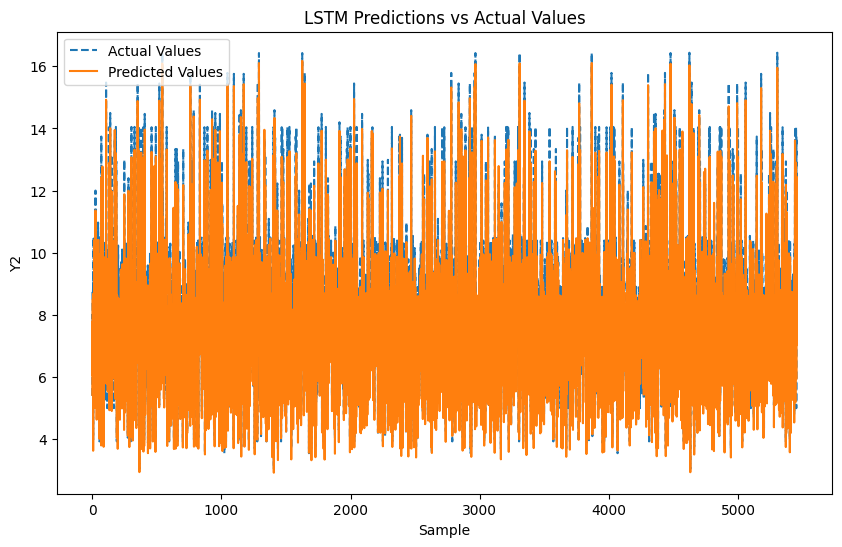

In [1]:
## time_steps = 1

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
file_path = 'Duke.xlsx'  # Replace with the path to your file
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Convert PublishDate to datetime and set as index
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# Extract relevant columns and add time-based features
selected_data = df[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Y2']]
selected_data['Month'] = selected_data.index.month
selected_data['Day'] = selected_data.index.day
selected_data['Year'] = selected_data.index.year

# Separate features and target
X = selected_data[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Month', 'Day', 'Year']]
y = selected_data['Y2']

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape data for LSTM (samples, time steps, features)
time_steps = 1
X_lstm = np.reshape(X_scaled, (X_scaled.shape[0], time_steps, X_scaled.shape[1]))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_scaled, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X_lstm.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Rescale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual Values", linestyle='dashed')
plt.plot(y_pred_rescaled, label="Predicted Values")
plt.title("LSTM Predictions vs Actual Values")
plt.xlabel("Sample")
plt.ylabel("Y2")
plt.legend()
plt.show()


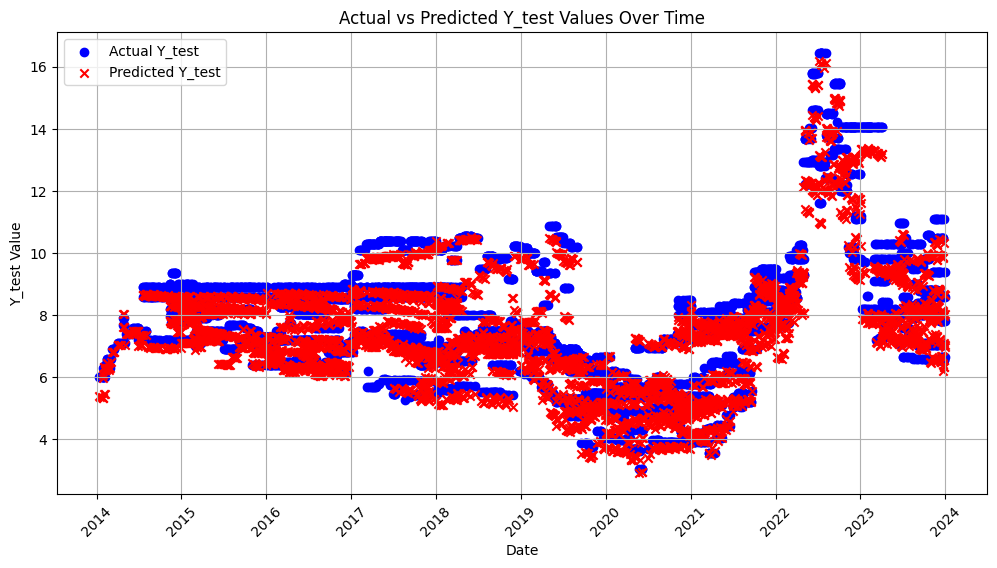

In [13]:
import matplotlib.pyplot as plt

# Retrieve the test indices
_, X_test_indices, _, y_test_indices = train_test_split(selected_data.index, y, test_size=0.2, random_state=42)

# Convert y_test and y_pred back to original scale
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

# Plot y_test and y_pred against their corresponding dates using scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(X_test_indices[:100], y_test_rescaled[:100], marker='o', color='b', label='Actual Y_test')
plt.scatter(X_test_indices[:100], y_pred_rescaled[:100], marker='x', color='r', label='Predicted Y_test')

plt.xlabel('Date')
plt.ylabel('Y_test Value')
plt.title('Actual vs Predicted Y_test Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\1505008985.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Month'] = selected_data.index.month
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\1505008985.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Day'] = selected_data.index.day
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\1505008985.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Epoch 1/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0166
Epoch 2/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0071
Epoch 3/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0061
Epoch 4/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0060
Epoch 5/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0056
Epoch 6/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0057
Epoch 7/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0055
Epoch 8/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0053
Epoch 9/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0054
Epoch 10/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0052
Epoch 11/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0052
Epoch 12/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0051
Epoch 13/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0049
Epoch 14/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0048
Epoch 15/50
681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - lo

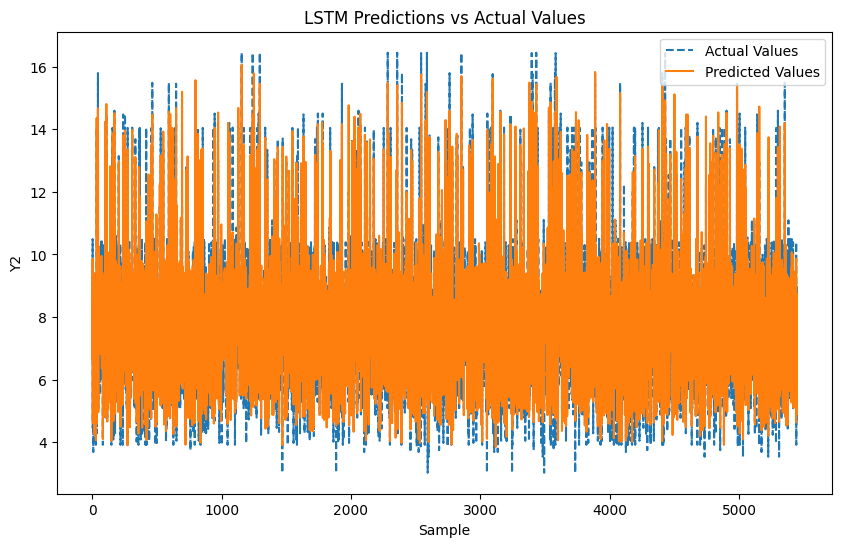

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'Duke.xlsx'  # Replace with the path to your file
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

df = df.sort_values(by='PublishDate')
# Convert PublishDate to datetime and set as index
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# Extract relevant columns and add time-based features
selected_data = df[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Y2']]
selected_data['Month'] = selected_data.index.month
selected_data['Day'] = selected_data.index.day
selected_data['Year'] = selected_data.index.year

# Separate features and target
X = selected_data[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Month', 'Day', 'Year']]
y = selected_data['Y2']

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(selected_data[['Y1', 'Z1', 'Z2', 'Z3', 'Z4']])
y_scaled = scaler_y.fit_transform(selected_data['Y2'].values.reshape(-1, 1))

# Create sequences for input (7 steps) and output (1 step)
def create_sequences(X, y, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

# time_steps = 7  # Use 7 days for input sequences
time_steps = 30
X_lstm, y_lstm = create_sequences(X_scaled, y_scaled, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X_lstm.shape[2])),
    Dense(1)  # Predict a single target value
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Rescale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual Values", linestyle='dashed')
plt.plot(y_pred_rescaled, label="Predicted Values")
plt.title("LSTM Predictions vs Actual Values")
plt.xlabel("Sample")
plt.ylabel("Y2")
plt.legend()
plt.show()

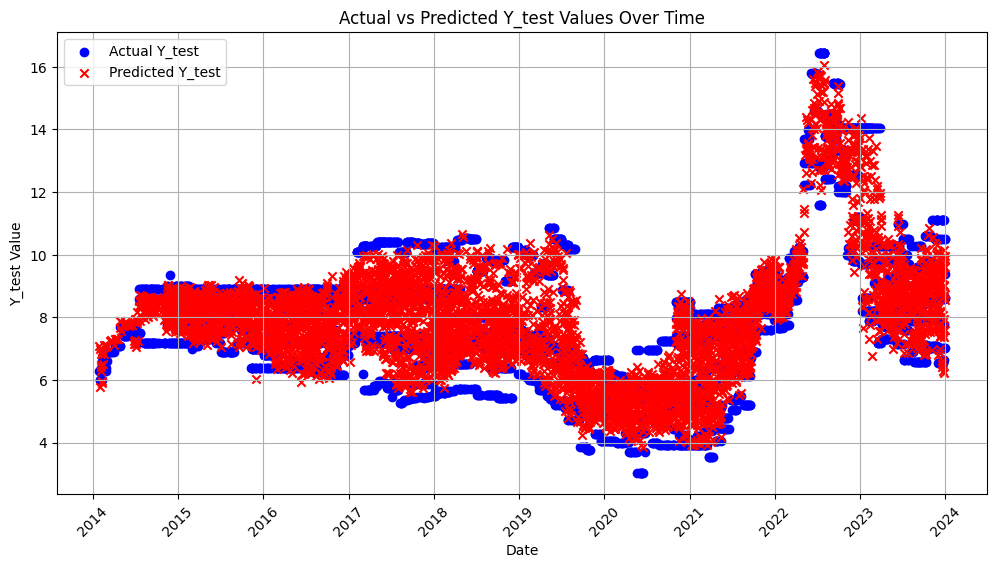

In [8]:
import matplotlib.pyplot as plt

# Retrieve the test indices, considering time_steps
_, X_test_indices, _, y_test_indices = train_test_split(
    selected_data.index[time_steps:], y[time_steps:], test_size=0.2, random_state=42
)

# Convert y_test and y_pred back to original scale
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

# Plot y_test and y_pred against corresponding dates
plt.figure(figsize=(12, 6))
plt.scatter(X_test_indices, y_test_rescaled, marker='o', color='b', label='Actual Y_test')
plt.scatter(X_test_indices, y_pred_rescaled, marker='x', color='r', label='Predicted Y_test')

plt.xlabel('Date')
plt.ylabel('Y_test Value')
plt.title('Actual vs Predicted Y_test Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()



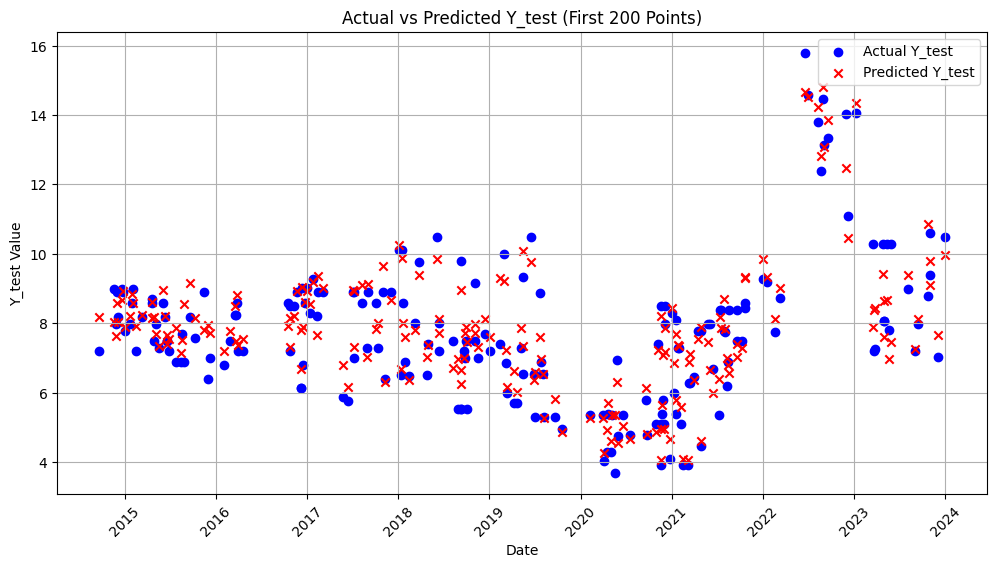

In [9]:
# Plot only a subset of the data for visualization
plt.figure(figsize=(12, 6))

# Choose a subset of test points (e.g., first 20 points)
subset_size = 200  # Change this value to see more or fewer points
plt.scatter(X_test_indices[:subset_size], y_test_rescaled[:subset_size], marker='o', color='b', label='Actual Y_test')
plt.scatter(X_test_indices[:subset_size], y_pred_rescaled[:subset_size], marker='x', color='r', label='Predicted Y_test')

plt.xlabel('Date')
plt.ylabel('Y_test Value')
plt.title(f'Actual vs Predicted Y_test (First {subset_size} Points)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


Epoch 1/50


C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_10580\550072536.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Month'] = selected_data.index.month
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_10580\550072536.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Day'] = selected_data.index.day
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_10580\550072536.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0388
Epoch 2/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0180
Epoch 3/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0157
Epoch 4/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0145
Epoch 5/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0145
Epoch 6/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0137
Epoch 7/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0125
Epoch 8/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0120
Epoch 9/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0111
Epoch 10/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0106
Epoch 11/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0103
Epoch 12/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0099
Epoch 13/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0096
Epoch 14/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0090
Epoch 15/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0089


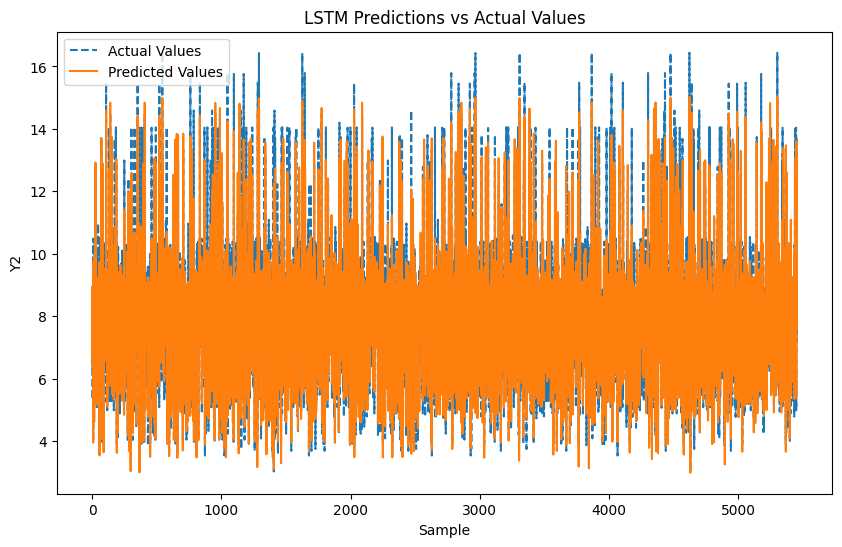

In [2]:
## Do not include Y1

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
file_path = 'Duke.xlsx'  # Replace with the path to your file
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Convert PublishDate to datetime and set as index
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# Extract relevant columns and add time-based features
selected_data = df[['Z1', 'Z2', 'Z3', 'Z4', 'Y2']]
selected_data['Month'] = selected_data.index.month
selected_data['Day'] = selected_data.index.day
selected_data['Year'] = selected_data.index.year

# Separate features and target
X = selected_data[['Z1', 'Z2', 'Z3', 'Z4', 'Month', 'Day', 'Year']]
y = selected_data['Y2']

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape data for LSTM (samples, time steps, features)
time_steps = 1
X_lstm = np.reshape(X_scaled, (X_scaled.shape[0], time_steps, X_scaled.shape[1]))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_scaled, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X_lstm.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Rescale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual Values", linestyle='dashed')
plt.plot(y_pred_rescaled, label="Predicted Values")
plt.title("LSTM Predictions vs Actual Values")
plt.xlabel("Sample")
plt.ylabel("Y2")
plt.legend()
plt.show()

Epoch 1/50


C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_10580\2135596091.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Month'] = selected_data.index.month
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_10580\2135596091.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Day'] = selected_data.index.day
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_10580\2135596091.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0265
Epoch 2/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0073
Epoch 3/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0059
Epoch 4/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0051
Epoch 5/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0047
Epoch 6/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0043
Epoch 7/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0040
Epoch 8/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0038
Epoch 9/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0035
Epoch 10/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0033
Epoch 11/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0032
Epoch 12/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0031
Epoch 13/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0029
Epoch 14/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0027
Epoch 15/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0026


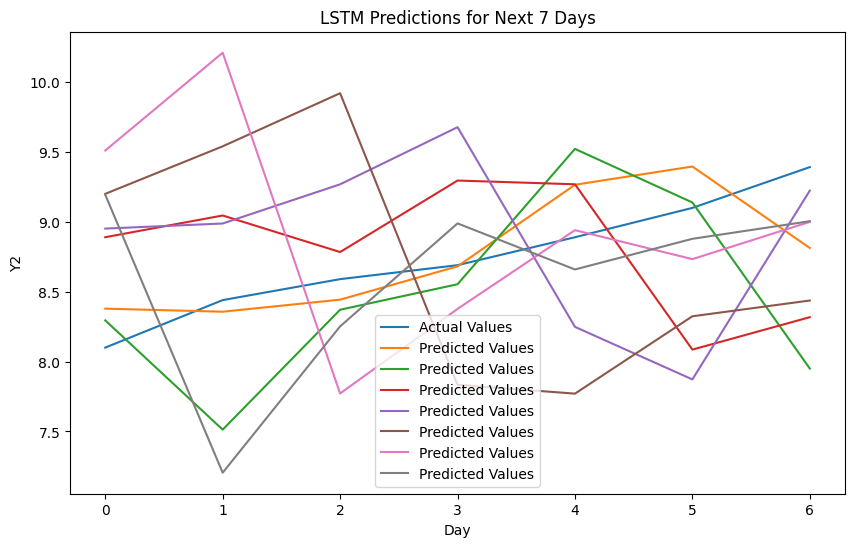

In [12]:
## previoud 7 days' data to predict the following 7 days' renewable price

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Duke.xlsx'  # Replace with your file path
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Convert PublishDate to datetime and set as index
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# Extract relevant columns and add time-based features
selected_data = df[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Y2']]
selected_data['Month'] = selected_data.index.month
selected_data['Day'] = selected_data.index.day
selected_data['Year'] = selected_data.index.year

# Separate features and target
X = selected_data[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Month', 'Day', 'Year']]
y = selected_data['Y2']

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Create sequences with input = 7 days and output = next 7 days
def create_sequences(X, y, time_steps, target_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps - target_steps + 1):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps:i + time_steps + target_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 30  # Input sequence length
target_steps = 30  # Output sequence length
X_lstm, y_lstm = create_sequences(X_scaled, y_scaled, time_steps, target_steps)

# Split into training and testing sets
split_index = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split_index], X_lstm[split_index:]
y_train, y_test = y_lstm[:split_index], y_lstm[split_index:]

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X_lstm.shape[2])),
    Dense(target_steps)  # Predict the next 7 values
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Rescale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = np.concatenate([scaler_y.inverse_transform(y) for y in y_test])

# Evaluate the model
mse = mean_squared_error(y_test_rescaled.flatten(), y_pred_rescaled.flatten())
r2 = r2_score(y_test_rescaled.flatten(), y_pred_rescaled.flatten())

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Plot the results for one prediction window
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled[:7], label="Actual Values")
plt.plot(y_pred_rescaled[:7], label="Predicted Values")
plt.title("LSTM Predictions for Next 7 Days")
plt.xlabel("Day")
plt.ylabel("Y2")
plt.legend()
plt.show()


In [16]:
# Predict on the train set
y_pred = model.predict(X_train)

# Rescale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_train_rescaled = np.concatenate([scaler_y.inverse_transform(y) for y in y_train])

# Evaluate the model
mse = mean_squared_error(y_train_rescaled.flatten(), y_pred_rescaled.flatten())
r2 = r2_score(y_train_rescaled.flatten(), y_pred_rescaled.flatten())

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error (MSE): 0.20616786419442798
R² Score: 0.9168544478482679


Epoch 1/50


C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_7148\926389462.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Month'] = selected_data.index.month
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_7148\926389462.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Day'] = selected_data.index.day
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_7148\926389462.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0195 - val_loss: 0.0108
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0070 - val_loss: 0.0118
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0061 - val_loss: 0.0132
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0056 - val_loss: 0.0165
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0053 - val_loss: 0.0206
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0050 - val_loss: 0.0211
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error (MSE): 3.905077985485274
R² Score: 0.3127620471195326


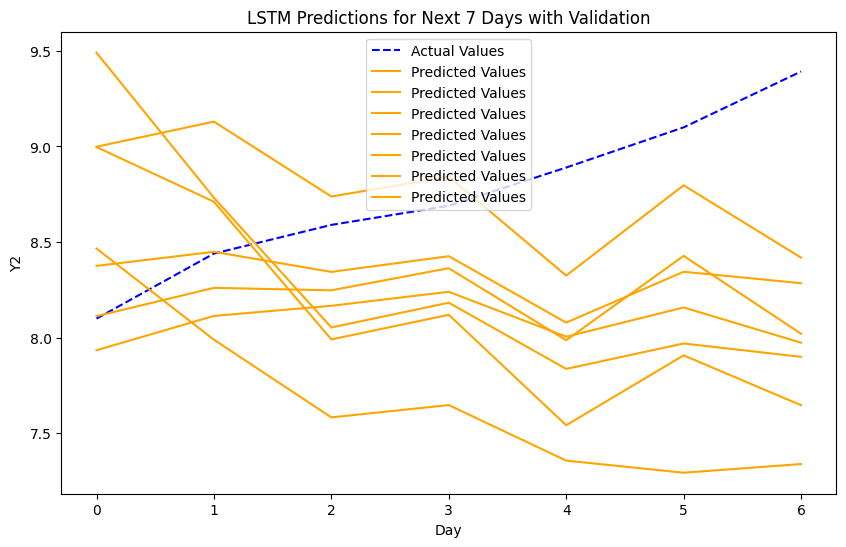

In [ ]:
## add a validation set to solve the overfitting problem
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = 'Duke.xlsx'  # Replace with your file path
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Convert PublishDate to datetime and set as index
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# Extract relevant columns and add time-based features
selected_data = df[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Y2']]
selected_data['Month'] = selected_data.index.month
selected_data['Day'] = selected_data.index.day
selected_data['Year'] = selected_data.index.year

# Separate features and target
X = selected_data[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Month', 'Day', 'Year']]
y = selected_data['Y2']

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Create sequences with input = 7 days and output = next 7 days
def create_sequences(X, y, time_steps, target_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps - target_steps + 1):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps:i + time_steps + target_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 7  # Input sequence length
target_steps = 7  # Output sequence length
X_lstm, y_lstm = create_sequences(X_scaled, y_scaled, time_steps, target_steps)

# Split into training, validation, and testing sets
train_split = int(0.6 * len(X_lstm))
val_split = int(0.8 * len(X_lstm))

X_train, X_val, X_test = X_lstm[:train_split], X_lstm[train_split:val_split], X_lstm[val_split:]
y_train, y_val, y_test = y_lstm[:train_split], y_lstm[train_split:val_split], y_lstm[val_split:]

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X_lstm.shape[2])),
    Dense(target_steps)  # Predict the next 7 values
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with validation data
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Predict on the test set
y_pred = model.predict(X_test)

# Rescale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = np.concatenate([scaler_y.inverse_transform(y) for y in y_test])

# Evaluate the model
mse = mean_squared_error(y_test_rescaled.flatten(), y_pred_rescaled.flatten())
r2 = r2_score(y_test_rescaled.flatten(), y_pred_rescaled.flatten())

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Plot the results for one prediction window
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled[:7], label="Actual Values", linestyle='dashed', color='blue')
plt.plot(y_pred_rescaled[:7], label="Predicted Values", color='orange')
plt.title("LSTM Predictions for Next 7 Days with Validation")
plt.xlabel("Day")
plt.ylabel("Y2")
plt.legend()
plt.show()


In [4]:
# Predict on the train set
y_pred = model.predict(X_train)

# Rescale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_train_rescaled = np.concatenate([scaler_y.inverse_transform(y) for y in y_train])

# Evaluate the model
mse = mean_squared_error(y_train_rescaled.flatten(), y_pred_rescaled.flatten())
r2 = r2_score(y_train_rescaled.flatten(), y_pred_rescaled.flatten())

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error (MSE): 1.3224176214088894
R² Score: 0.3448465302319764


In [6]:
# Predict on the lstm set
y_pred = model.predict(X_lstm)

# Rescale predictions and actual lstmues
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_lstm_rescaled = np.concatenate([scaler_y.inverse_transform(y) for y in y_lstm])

# Elstmuate the model
mse = mean_squared_error(y_lstm_rescaled.flatten(), y_pred_rescaled.flatten())
r2 = r2_score(y_lstm_rescaled.flatten(), y_pred_rescaled.flatten())

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error (MSE): 1.9645302915149911
R² Score: 0.536686589094067


C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_18336\2925145698.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[f'Y2_lag_{lag}'] = selected_data['Y2'].shift(lag)
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_18336\2925145698.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[f'Y2_lag_{lag}'] = selected_data['Y2'].shift(lag)
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_18336\2925145698.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

Epoch 1/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0202 - val_loss: 0.0073
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0060 - val_loss: 0.0092
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0050 - val_loss: 0.0090
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0044 - val_loss: 0.0088
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0039 - val_loss: 0.0087
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0036 - val_loss: 0.0092
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error (MSE): 4.262290367161479
R² Score: 0.25009526274166793


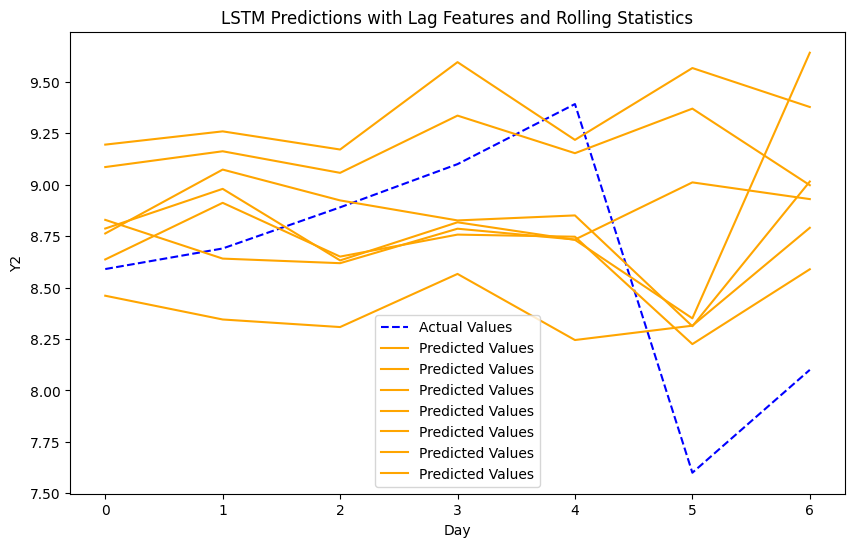

In [1]:
## Add lag features of Y2 and rolling statistics to improve the result

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Duke.xlsx'  # Replace with your file path
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Convert PublishDate to datetime and set as index
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# Extract relevant columns
selected_data = df[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Y2']]

# Add lag features for the past 7 days
for lag in range(1, 8):
    selected_data[f'Y2_lag_{lag}'] = selected_data['Y2'].shift(lag)

# Add rolling statistics for the past 7 days
selected_data['Y2_roll_mean_7'] = selected_data['Y2'].rolling(window=7).mean()
selected_data['Y2_roll_std_7'] = selected_data['Y2'].rolling(window=7).std()

# Drop rows with NaN values created by lagging/rolling
selected_data.dropna(inplace=True)

# Separate features and target
X = selected_data.drop(columns=['Y2'])
y = selected_data['Y2']

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Create sequences for input (7 days) and output (next 7 days)
def create_sequences(X, y, time_steps, target_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps - target_steps + 1):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps:i + time_steps + target_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 7  # Use 7 days for input sequences
target_steps = 7  # Predict the next 7 days
X_lstm, y_lstm = create_sequences(X_scaled, y_scaled, time_steps, target_steps)

# Split into training, validation, and testing sets
train_split = int(0.6 * len(X_lstm))
val_split = int(0.8 * len(X_lstm))

X_train, X_val, X_test = X_lstm[:train_split], X_lstm[train_split:val_split], X_lstm[val_split:]
y_train, y_val, y_test = y_lstm[:train_split], y_lstm[train_split:val_split], y_lstm[val_split:]

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X_lstm.shape[2])),
    Dense(target_steps)  # Predict the next 7 values
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with validation data
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Predict on the test set
y_pred = model.predict(X_test)

# Rescale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = np.concatenate([scaler_y.inverse_transform(y) for y in y_test])

# Evaluate the model
mse = mean_squared_error(y_test_rescaled.flatten(), y_pred_rescaled.flatten())
r2 = r2_score(y_test_rescaled.flatten(), y_pred_rescaled.flatten())

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Plot the results for one prediction window
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled[:7], label="Actual Values", linestyle='dashed', color='blue')
plt.plot(y_pred_rescaled[:7], label="Predicted Values", color='orange')
plt.title("LSTM Predictions with Lag Features and Rolling Statistics")
plt.xlabel("Day")
plt.ylabel("Y2")
plt.legend()
plt.show()


In [2]:
# Predict on the train set
y_pred = model.predict(X_train)

# Rescale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_train_rescaled = np.concatenate([scaler_y.inverse_transform(y) for y in y_train])

# Evaluate the model
mse = mean_squared_error(y_train_rescaled.flatten(), y_pred_rescaled.flatten())
r2 = r2_score(y_train_rescaled.flatten(), y_pred_rescaled.flatten())

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error (MSE): 1.100793084699634
R² Score: 0.4547927635827995


## Random Forest

C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\3930575973.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Month'] = selected_data.index.month
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\3930575973.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Day'] = selected_data.index.day
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\3930575973.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Mean Squared Error (MSE): 5.508509438656486
R² Score: 0.030397952371309822


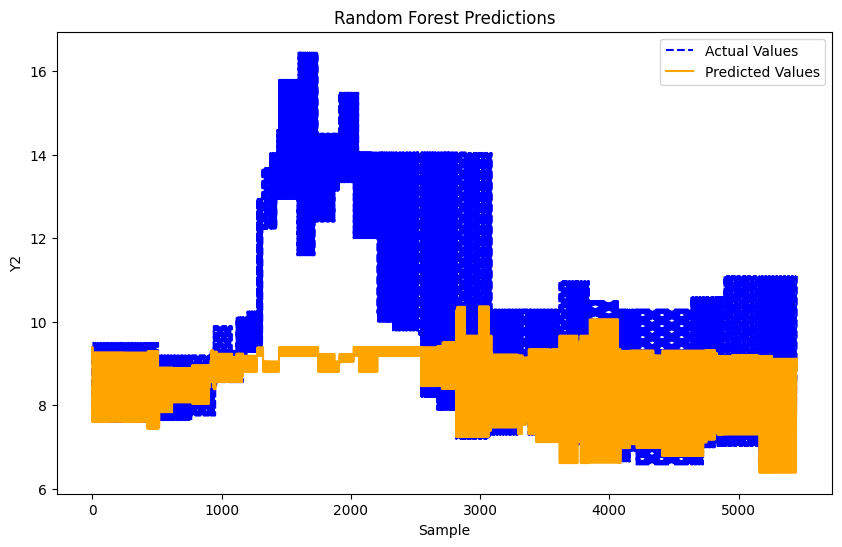

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'Duke.xlsx'  # Replace with your file path
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Convert PublishDate to datetime and set as index
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# Extract relevant columns and add time-based features
selected_data = df[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Y2']]
selected_data['Month'] = selected_data.index.month
selected_data['Day'] = selected_data.index.day
selected_data['Year'] = selected_data.index.year

# Separate features and target
X = selected_data[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Month', 'Day', 'Year']]
y = selected_data['Y2']

# Add lag features for the past 7 days
for lag in range(1, 8):
    selected_data[f'Y2_lag_{lag}'] = selected_data['Y2'].shift(lag)

# Add rolling statistics for the past 7 days
selected_data['Y2_roll_mean_7'] = selected_data['Y2'].rolling(window=7).mean()
selected_data['Y2_roll_std_7'] = selected_data['Y2'].rolling(window=7).std()

# Drop rows with NaN values created by lagging/rolling
selected_data.dropna(inplace=True)

# Separate features and target
X = selected_data.drop(columns=['Y2'])
y = selected_data['Y2']

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split data into training and testing sets
train_split = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_split], X_scaled[train_split:]
y_train, y_test = y_scaled[:train_split], y_scaled[train_split:]

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Rescale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual Values", linestyle='dashed', color='blue')
plt.plot(y_pred_rescaled, label="Predicted Values", color='orange')
plt.title("Random Forest Predictions")
plt.xlabel("Sample")
plt.ylabel("Y2")
plt.legend()
plt.show()


In [3]:
# Predict on the train set
y_pred = rf_model.predict(X_train)

# Rescale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_train_rescaled = scaler_y.inverse_transform(y_train)

# Evaluate the model
mse = mean_squared_error(y_train_rescaled, y_pred_rescaled)
r2 = r2_score(y_train_rescaled, y_pred_rescaled)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.00021805662371824245
R² Score: 0.9999120537023432


C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\1944940289.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Month'] = selected_data.index.month
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\1944940289.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Day'] = selected_data.index.day
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\1944940289.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Validation Mean Squared Error (MSE): 0.35221515510708945
Validation R² Score: 0.8338834461734892
Test Mean Squared Error (MSE): 3.346677947332943
Test R² Score: 0.4108320283195731


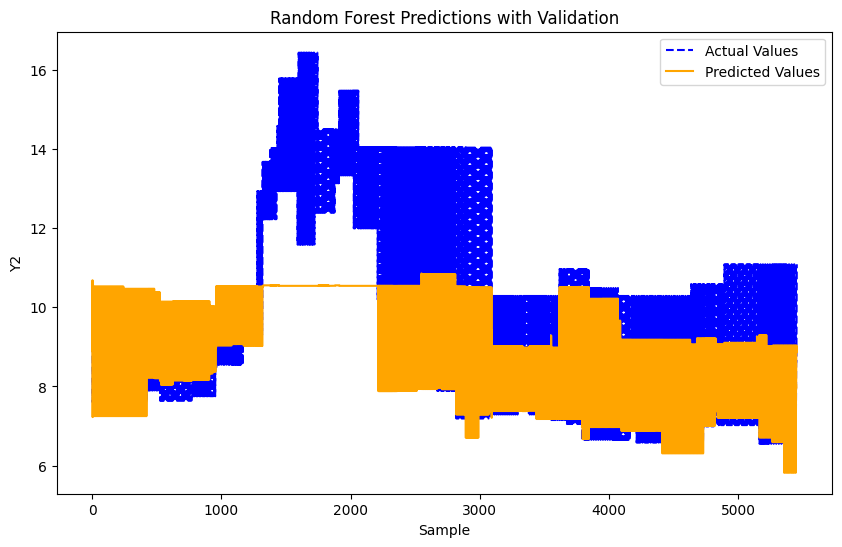

           Feature    Importance
0               Y1  5.082004e-01
3               Z3  1.641471e-01
8         Y2_lag_1  1.524968e-01
9         Y2_lag_2  7.431183e-02
14        Y2_lag_7  4.258485e-02
7             Year  3.163254e-02
15  Y2_roll_mean_7  8.356715e-03
1               Z1  7.335046e-03
16   Y2_roll_std_7  4.649375e-03
12        Y2_lag_5  2.658899e-03
10        Y2_lag_3  1.149513e-03
11        Y2_lag_4  1.111895e-03
13        Y2_lag_6  6.342725e-04
5            Month  4.956255e-04
4               Z4  2.306947e-04
6              Day  4.399174e-06
2               Z2  7.990842e-08


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
file_path = 'Duke.xlsx'  # Replace with your file path
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Convert PublishDate to datetime and set as index
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# Extract relevant columns and add time-based features
selected_data = df[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Y2']]
selected_data['Month'] = selected_data.index.month
selected_data['Day'] = selected_data.index.day
selected_data['Year'] = selected_data.index.year

# Add lag features for the past 7 days
for lag in range(1, 8):
    selected_data[f'Y2_lag_{lag}'] = selected_data['Y2'].shift(lag)

# Add rolling statistics for the past 7 days
selected_data['Y2_roll_mean_7'] = selected_data['Y2'].rolling(window=7).mean()
selected_data['Y2_roll_std_7'] = selected_data['Y2'].rolling(window=7).std()

# Drop rows with NaN values created by lagging/rolling
selected_data.dropna(inplace=True)

# Separate features and target
X = selected_data.drop(columns=['Y2']).values
y = selected_data['Y2'].values

# Split data into training, validation, and testing sets (60% train, 20% validation, 20% test)
train_size = int(0.6 * len(X))
val_size = int(0.2 * len(X))

X_train, X_temp = X[:train_size], X[train_size:]
y_train, y_temp = y[:train_size], y[train_size:]

X_val, X_test = X_temp[:val_size], X_temp[val_size:]
y_val, y_test = y_temp[:val_size], y_temp[val_size:]

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = rf_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Validation Mean Squared Error (MSE):", val_mse)
print("Validation R² Score:", val_r2)

# Predict on the test set
y_test_pred = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Mean Squared Error (MSE):", test_mse)
print("Test R² Score:", test_r2)

# Plot predictions vs actual values for test set
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Values", linestyle='dashed', color='blue')
plt.plot(y_test_pred, label="Predicted Values", color='orange')
plt.title("Random Forest Predictions with Validation")
plt.xlabel("Sample")
plt.ylabel("Y2")
plt.legend()
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': selected_data.drop(columns=['Y2']).columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)


In [11]:
print("Original Dataset Size:", len(df))
print("Dataset Size After Lagging and Rolling Features:", len(selected_data))


Original Dataset Size: 27265
Dataset Size After Lagging and Rolling Features: 27258


In [12]:
print(len(y_train))
print(len(y_val))
print(len(y_test))

16354
5451
5453


## XGBoost

[0]	train-rmse:1.31381	validation-rmse:1.99030
[10]	train-rmse:0.61734	validation-rmse:1.07655
[20]	train-rmse:0.33146	validation-rmse:0.78670
[30]	train-rmse:0.22463	validation-rmse:0.67888
[40]	train-rmse:0.16923	validation-rmse:0.65420


C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\2975097387.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Month'] = selected_data.index.month
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\2975097387.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Day'] = selected_data.index.day
C:\Users\ji.702\AppData\Local\Temp\1\ipykernel_14992\2975097387.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

[50]	train-rmse:0.14056	validation-rmse:0.64317
[60]	train-rmse:0.12547	validation-rmse:0.63620
[70]	train-rmse:0.12159	validation-rmse:0.63398
[80]	train-rmse:0.12061	validation-rmse:0.63417
[82]	train-rmse:0.12061	validation-rmse:0.63418
Mean Squared Error (MSE): 4.884652493849988
R² Score: 0.14020859676575637


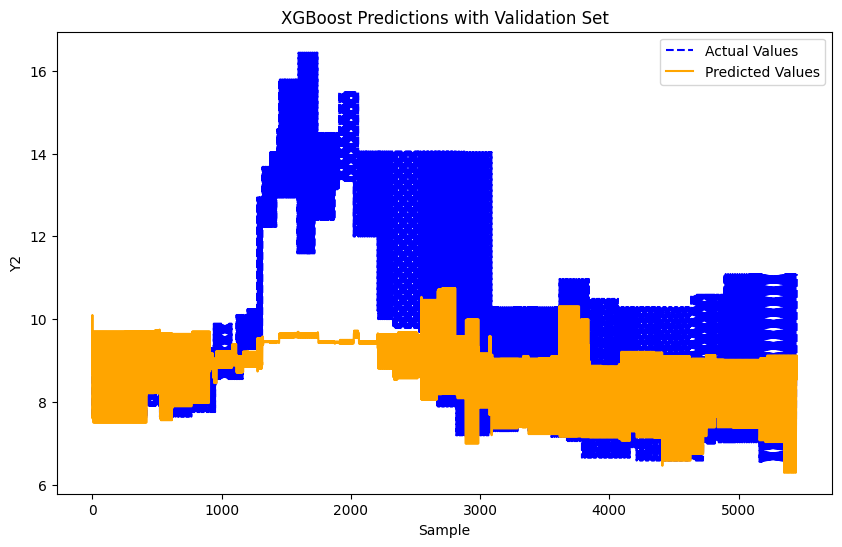

In [5]:
import numpy as np
import pandas as pd
from xgboost import DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Duke.xlsx'  # Replace with your file path
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Convert PublishDate to datetime and set as index
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# Extract relevant columns and add time-based features
selected_data = df[['Y1', 'Z1', 'Z2', 'Z3', 'Z4', 'Y2']]
selected_data['Month'] = selected_data.index.month
selected_data['Day'] = selected_data.index.day
selected_data['Year'] = selected_data.index.year

# Add lag features for the past 7 days
for lag in range(1, 8):
    selected_data[f'Y2_lag_{lag}'] = selected_data['Y2'].shift(lag)

# Add rolling statistics for the past 7 days
selected_data['Y2_roll_mean_7'] = selected_data['Y2'].rolling(window=7).mean()
selected_data['Y2_roll_std_7'] = selected_data['Y2'].rolling(window=7).std()

# Drop rows with NaN values created by lagging/rolling
selected_data.dropna(inplace=True)

# Separate features and target
X = selected_data.drop(columns=['Y2']).values
y = selected_data['Y2'].values

# Split data into training, validation, and testing sets
train_split = int(0.6 * len(X))
val_split = int(0.8 * len(X))

X_train, X_val, X_test = X[:train_split], X[train_split:val_split], X[val_split:]
y_train, y_val, y_test = y[:train_split], y[train_split:val_split], y[val_split:]

# Create DMatrix objects for training, validation, and testing
dtrain = DMatrix(X_train, label=y_train)
dval = DMatrix(X_val, label=y_val)
dtest = DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 4,
    'min_child_weight': 5,
    'gamma': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1,
    'alpha': 0.5,
    'seed': 42
}

# Train the XGBoost model with early stopping
evals = [(dtrain, 'train'), (dval, 'validation')]
xgb_model = train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=10
)

# Predict on the test set
y_pred = xgb_model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Values", linestyle='dashed', color='blue')
plt.plot(y_pred, label="Predicted Values", color='orange')
plt.title("XGBoost Predictions with Validation Set")
plt.xlabel("Sample")
plt.ylabel("Y2")
plt.legend()
plt.show()


In [6]:
# Predict on the train set
y_pred = xgb_model.predict(dtrain)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.014547581558500151
R² Score: 0.992791833001746


In [6]:
# Predict on the val set
y_pred = xgb_model.predict(dval)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.4287852841252267
R² Score: 0.7978698737330749


## LSTM: Aggregating Variable-Length Observations

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'Duke.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')
df = df.sort_values(by='PublishDate')

# Convert PublishDate to datetime and set as index
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# Aggregate multiple observations per time step (including count)
df_grouped = df.groupby(df.index).agg({
    'Y2': ['mean', 'std', 'min', 'max', 'count'],  # Price statistics (Target)
    'Y1': ['mean', 'std', 'min', 'max', 'count'],  # Feature statistics
    'Z1': ['mean', 'std', 'min', 'max', 'count'],
    'Z2': ['mean', 'std', 'min', 'max', 'count'],
    'Z3': ['mean', 'std', 'min', 'max', 'count'],
    'Z4': ['mean', 'std', 'min', 'max', 'count']
})

# Rename columns for clarity
df_grouped.columns = ['_'.join(col) for col in df_grouped.columns]
df_grouped.reset_index(inplace=True)  # Reset index if needed

# Fill NaN values (e.g., standard deviation of a single value should be 0)
df_grouped.fillna(0, inplace=True)

print(df_grouped.head())  # Display the first few rows of the aggregated dataset

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Selecting input (X) and output (y)
X_features = df_grouped.drop(columns=['PublishDate', 'Y2_mean', 'Y2_std', 'Y2_min', 'Y2_max','Y2_count'])  # All features
y_target = df_grouped[['Y2_mean', 'Y2_std', 'Y2_min', 'Y2_max','Y2_count']]  # Target

X_scaled = scaler_X.fit_transform(X_features)
y_scaled = scaler_y.fit_transform(y_target)

# Convert to sequences for LSTM (past 7 time steps → next step prediction)
def create_sequences(X, y, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])  # Past time steps as input
        y_seq.append(y[i + time_steps])  # Predict next time step
    return np.array(X_seq), np.array(y_seq)

time_steps = 7  # Use past 7 days to predict next step
X_lstm, y_lstm = create_sequences(X_scaled, y_scaled, time_steps)

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X_lstm.shape[2])),
    Dense(5)  # Predict mean, std, min, max, count of Y2
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Predict on the test set
y_pred = model.predict(X_test)


  PublishDate  Y2_mean  Y2_std  Y2_min  Y2_max  Y2_count  Y1_mean  Y1_std  \
0  2014-01-10     5.99     0.0    5.99    5.99         1     5.49     0.0   
1  2014-01-11     5.99     0.0    5.99    5.99         1     5.49     0.0   
2  2014-01-12     5.99     0.0    5.99    5.99         1     5.49     0.0   
3  2014-01-13     5.99     0.0    5.99    5.99         1     5.49     0.0   
4  2014-01-14     5.99     0.0    5.99    5.99         1     5.49     0.0   

   Y1_min  Y1_max  ...  Z3_mean  Z3_std  Z3_min  Z3_max  Z3_count  Z4_mean  \
0    5.49    5.49  ...      0.0     0.0       0       0         1    100.0   
1    5.49    5.49  ...      0.0     0.0       0       0         1    100.0   
2    5.49    5.49  ...      0.0     0.0       0       0         1    100.0   
3    5.49    5.49  ...      0.0     0.0       0       0         1    100.0   
4    5.49    5.49  ...      0.0     0.0       0       0         1    100.0   

   Z4_std  Z4_min  Z4_max  Z4_count  
0     0.0     100     100     

c:\Users\ji.702\AppData\Local\anaconda3\envs\my-env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1151 - val_loss: 0.0088
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - val_loss: 0.0047
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0014

In [3]:
# Rescale predictions back to original values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

from sklearn.metrics import mean_squared_error, r2_score

# Loop through each target variable
for i, label in enumerate(['Mean', 'Std', 'Min', 'Max', 'Count']):
    mse = mean_squared_error(y_test_rescaled[:, i], y_pred_rescaled[:, i])  # Compare actual vs. predicted
    r2 = r2_score(y_test_rescaled[:, i], y_pred_rescaled[:, i])  # Calculate R²
    print(f"{label}: MSE = {mse:.4f}, R² = {r2:.4f}")



Mean: MSE = 0.0336, R² = 0.9898
Std: MSE = 0.0272, R² = 0.9049
Min: MSE = 0.0635, R² = 0.9828
Max: MSE = 0.1226, R² = 0.9699
Count: MSE = 0.1502, R² = 0.9767


In [4]:
# Predict on the train set
y_pred_train = model.predict(X_train)

# Rescale predictions back to original values
y_pred_train_rescaled = scaler_y.inverse_transform(y_pred_train)
y_train_rescaled = scaler_y.inverse_transform(y_train)

# Loop through each target variable
for i, label in enumerate(['Mean', 'Std', 'Min', 'Max', 'Count']):
    mse = mean_squared_error(y_train_rescaled[:, i], y_pred_train_rescaled[:, i])  # Compare actual vs. predicted
    r2 = r2_score(y_train_rescaled[:, i], y_pred_train_rescaled[:, i])  # Calculate R²
    print(f"{label}: MSE = {mse:.4f}, R² = {r2:.4f}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean: MSE = 0.0292, R² = 0.9917
Std: MSE = 0.0236, R² = 0.9200
Min: MSE = 0.0494, R² = 0.9870
Max: MSE = 0.1089, R² = 0.9748
Count: MSE = 0.1168, R² = 0.9799


In [6]:
# Check if y_lstm exists before train-test split
try:
    print(f"Shape of y_lstm: {y_lstm.shape}")
except NameError:
    print("Error: y_lstm is not defined. Ensure sequences were created properly.")

# Check if train-test split was performed
try:
    print(f"Shape of y_test: {y_test.shape}")
except NameError:
    print("Error: y_test is not defined. Ensure train_test_split() was executed.")


Shape of y_lstm: (3626, 5)
Shape of y_test: (726, 5)


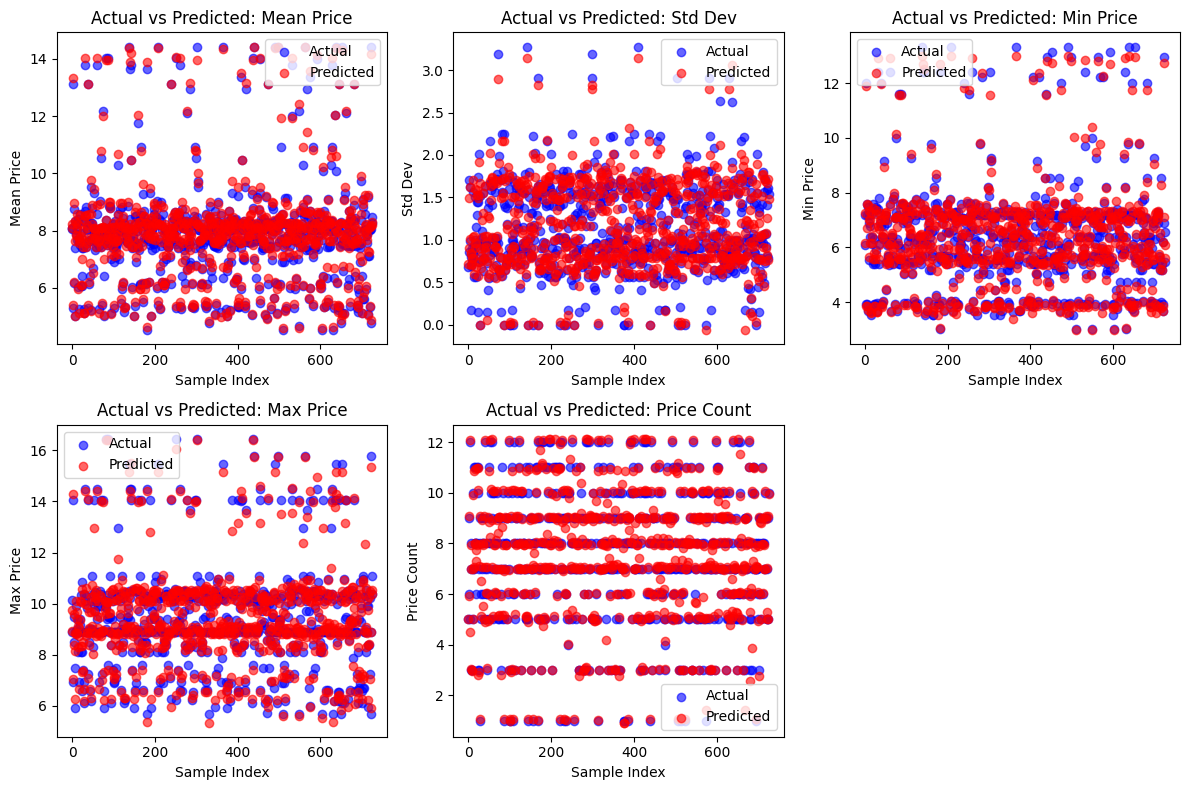

In [3]:
import matplotlib.pyplot as plt

# Define column names for readability
y_labels = ['Mean Price', 'Std Dev', 'Min Price', 'Max Price', 'Price Count']

# Determine the number of subplots dynamically
num_plots = y_test_rescaled.shape[1]
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Arrange in 3 columns

# Create subplots for each target variable
plt.figure(figsize=(12, 8))

for i in range(num_plots):  # Loop through each predicted output
    plt.subplot(rows, 3, i + 1)  # Adjust dynamically based on the number of targets
    plt.scatter(range(len(y_test_rescaled)), y_test_rescaled[:, i], label="Actual", color='blue', alpha=0.6)
    plt.scatter(range(len(y_pred_rescaled)), y_pred_rescaled[:, i], label="Predicted", color='red', alpha=0.6)
    plt.title(f'Actual vs Predicted: {y_labels[i]}')
    plt.xlabel("Sample Index")
    plt.ylabel(y_labels[i])
    plt.legend()

plt.tight_layout()
plt.show()


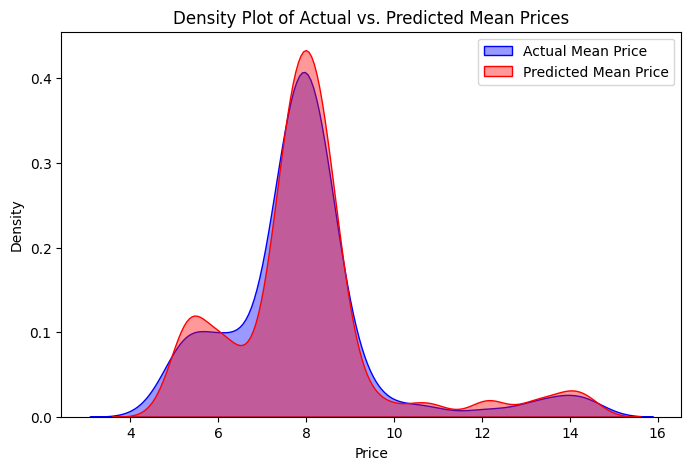

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

plt.figure(figsize=(8, 5))
sns.kdeplot(y_test_rescaled[:, 0], label="Actual Mean Price", fill=True, color="blue", alpha=0.4)
sns.kdeplot(y_pred_rescaled[:, 0], label="Predicted Mean Price", fill=True, color="red", alpha=0.4)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Density Plot of Actual vs. Predicted Mean Prices")
plt.legend()
plt.show()



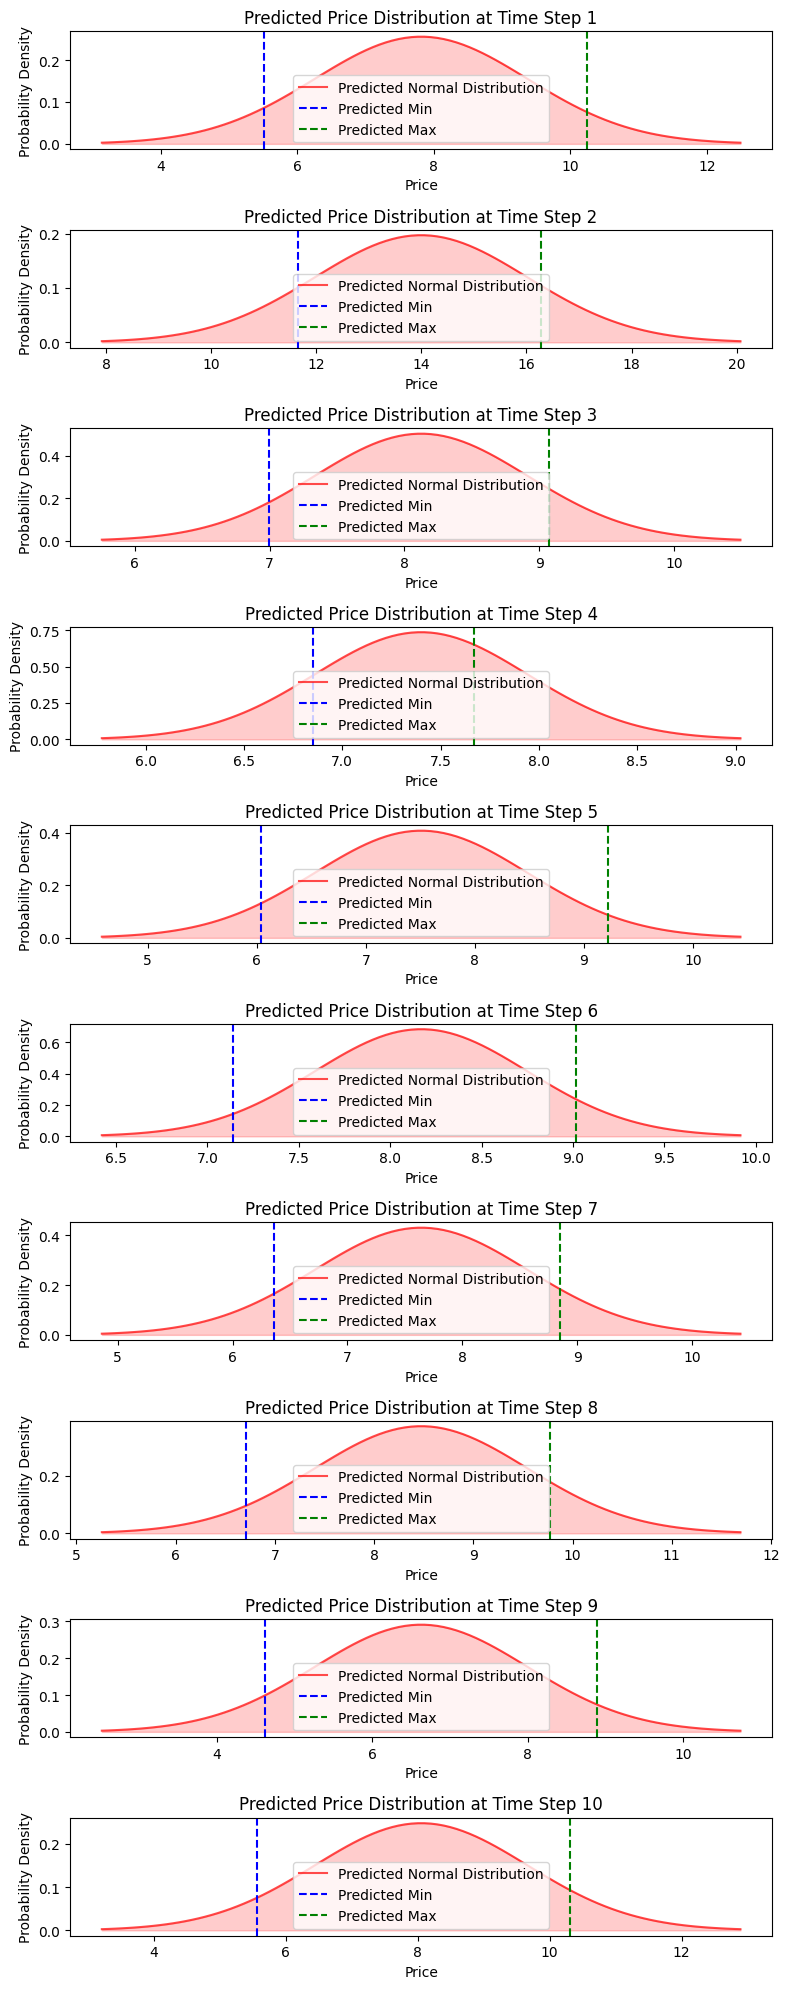

In [5]:
# Number of time steps to visualize
num_time_steps = min(10, len(y_pred_rescaled))  # Limit to first 10 for clarity

# Create subplots
fig, axes = plt.subplots(nrows=num_time_steps, figsize=(8, num_time_steps * 2))

for i in range(num_time_steps):
    ax = axes[i] if num_time_steps > 1 else axes  # Handle single plot case

    # Extract predicted values
    mu = y_pred_rescaled[i, 0]  # Mean
    sigma = y_pred_rescaled[i, 1]  # Std deviation
    min_price = y_pred_rescaled[i, 2]  # Min price
    max_price = y_pred_rescaled[i, 3]  # Max price

    # Generate normal distribution based on predicted mean & std
    if sigma > 0:  # Avoid invalid distributions
        x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
        y = stats.norm.pdf(x, mu, sigma)

        ax.plot(x, y, color='red', alpha=0.7, label="Predicted Normal Distribution")
        ax.fill_between(x, y, color='red', alpha=0.2)

    # Plot Min and Max as vertical lines
    ax.axvline(min_price, color='blue', linestyle="dashed", label="Predicted Min")
    ax.axvline(max_price, color='green', linestyle="dashed", label="Predicted Max")

    # Title and labels
    ax.set_title(f"Predicted Price Distribution at Time Step {i + 1}")
    ax.set_xlabel("Price")
    ax.set_ylabel("Probability Density")
    ax.legend()

plt.tight_layout()
plt.show()


## probabilistic forecasting

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def negative_log_likelihood(y_true, y_pred):
    # y_true: (batch_size, 1)
    # y_pred: (batch_size, 2) -> [mu, log_sigma_pre]
    y_true = tf.reshape(y_true, (-1,))
    mu = y_pred[:, 0]
    sigma = tf.math.softplus(y_pred[:, 1]) + 1e-6
    nll = 0.5 * tf.math.log(2.0 * np.pi) + tf.math.log(sigma) + 0.5 * tf.square((y_true - mu) / sigma)
    return tf.reduce_mean(nll)

def create_sequences(X, y, time_steps=7):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps - 1):
        X_seq.append(X[i : i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

# 1. Load Data
file_path = 'Duke.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
df = df.sort_values(by='PublishDate')
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# 2. Aggregate
df_grouped = df.groupby(df.index).agg({
    'Y2': ['mean', 'std'],  
    'Y1': ['mean', 'std'],
    'Z1': ['mean', 'std'],
    'Z2': ['mean', 'std'],
    'Z3': ['mean', 'std'],
    'Z4': ['mean', 'std']
})
df_grouped.columns = ['_'.join(col) for col in df_grouped.columns]
df_grouped.reset_index(inplace=True)
df_grouped.rename(columns={'PublishDate': 'Date'}, inplace=True)
df_grouped.fillna(0, inplace=True)

# 3. Prepare X, y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Target is only the mean of Y2
X_features = df_grouped.drop(columns=['Date','Y2_mean','Y2_std'])  # keep the std as a feature if you want
y_target = df_grouped[['Y2_mean']]  # shape: (samples, 1)

X_scaled = scaler_X.fit_transform(X_features)
y_scaled = scaler_y.fit_transform(y_target)

time_steps = 7
X_lstm, y_lstm = create_sequences(X_scaled, y_scaled, time_steps)
print("X_lstm shape:", X_lstm.shape)  # (num_samples, 7, num_features)
print("y_lstm shape:", y_lstm.shape)  # (num_samples, 1)

# 4. Split
X_train, X_test, y_train, y_test = train_test_split(
    X_lstm, y_lstm, 
    test_size=0.2, 
    random_state=42
)

# 5. Build Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X_lstm.shape[2])),
    Dense(2)  # [mu, sigma_pre]
])
model.compile(optimizer='adam', loss=negative_log_likelihood)

# 6. Train
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 7. Predict
y_pred = model.predict(X_test)
pred_mu = y_pred[:, 0]
pred_sigma = tf.math.softplus(y_pred[:, 1]).numpy()

# 8. Inverse transform
y_test_rescaled = scaler_y.inverse_transform(y_test)
pred_mu_rescaled = scaler_y.inverse_transform(pred_mu.reshape(-1,1))

print("True first 5:", y_test_rescaled[:5].flatten())
print("Pred mu  first 5:", pred_mu_rescaled[:5].flatten())


X_lstm shape: (3625, 7, 10)
y_lstm shape: (3625, 1)
Epoch 1/50


c:\Users\ji.702\AppData\Local\anaconda3\envs\my-env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2190 - val_loss: -1.6384
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -1.2265 - val_loss: -1.6878
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -1.5912 - val_loss: -1.3060
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -1.7987 - val_loss: -2.0432
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -1.5941 - val_loss: -0.6072
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -0.8122 - val_loss: -1.9617
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -1.8665 - val_loss: -2.0818
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -2.0877 - val_loss: -2.3485
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -2.2283 - val_loss: -2.2643
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -2.3180 - val_loss: -2.4286
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -2.5110 - val_loss: -2.3664
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: -2.27

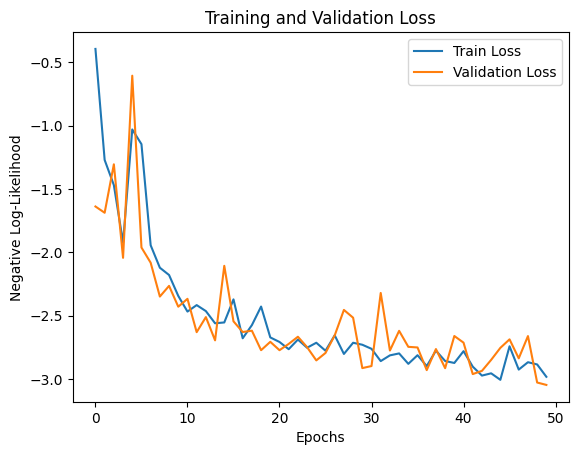

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Negative Log-Likelihood')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [3]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (NLL): {test_loss}")


Test Loss (NLL): -2.98511004447937


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true_flat = y_test_rescaled.flatten()
pred_mu_flat = pred_mu_rescaled.flatten()

rmse = np.sqrt(mean_squared_error(y_true_flat, pred_mu_flat))
mae = mean_absolute_error(y_true_flat, pred_mu_flat)
r2 = r2_score(y_true_flat, pred_mu_flat)

print("RMSE (mean predictions vs actual):", rmse)
print("MAE  (mean predictions vs actual):", mae)
print("R2  (mean predictions vs actual):", r2)

RMSE (mean predictions vs actual): 0.14459326758711613
MAE  (mean predictions vs actual): 0.0902238969249096
R2  (mean predictions vs actual): 0.993708879670344


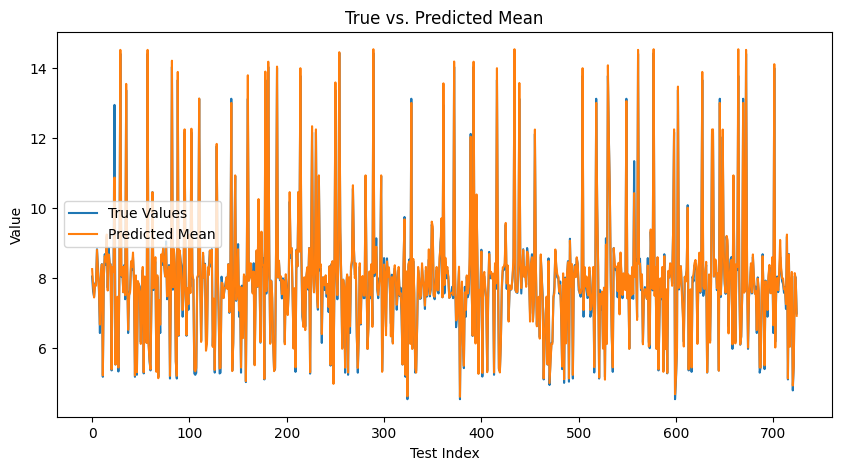

In [5]:
import matplotlib.pyplot as plt

# Suppose we have len(y_test_rescaled) test points
num_test = len(y_test_rescaled)
time_axis = np.arange(num_test)  # or use actual timestamps if available

plt.figure(figsize=(10, 5))

# Plot true values (blue line)
plt.plot(time_axis, y_true_flat, label='True Values', color='C0')

# Plot predicted mean (orange line)
plt.plot(time_axis, pred_mu_flat, label='Predicted Mean', color='C1')

plt.title("True vs. Predicted Mean")
plt.xlabel("Test Index")
plt.ylabel("Value")
plt.legend()
plt.show()


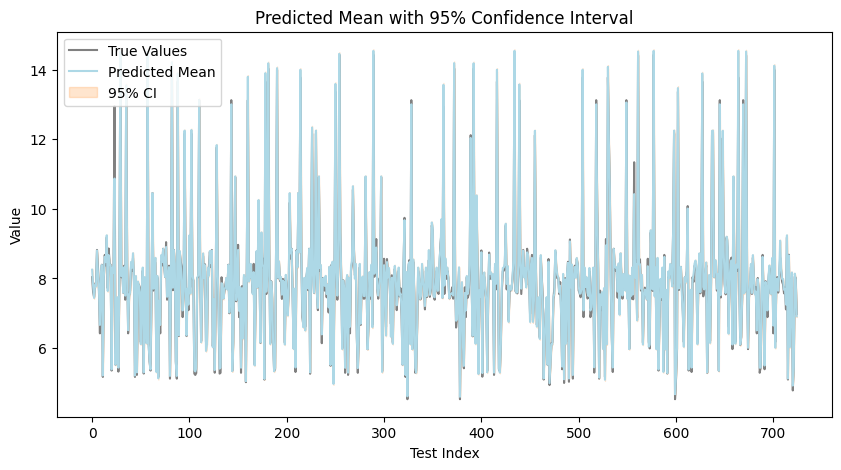

In [8]:
pred_sigma_flat = pred_sigma.flatten()  # ensure shape is (num_test,)

ci_multiplier = 1.96
lower = pred_mu_flat - ci_multiplier * pred_sigma_flat
upper = pred_mu_flat + ci_multiplier * pred_sigma_flat

plt.figure(figsize=(10, 5))
plt.plot(time_axis, y_true_flat, label='True Values', color='gray')
plt.plot(time_axis, pred_mu_flat, label='Predicted Mean', color='lightblue')

# Fill the confidence interval
plt.fill_between(
    time_axis,
    lower,
    upper,
    color='C1',
    alpha=0.2,
    label='95% CI'
)

plt.title("Predicted Mean with 95% Confidence Interval")
plt.xlabel("Test Index")
plt.ylabel("Value")
plt.legend()
plt.show()


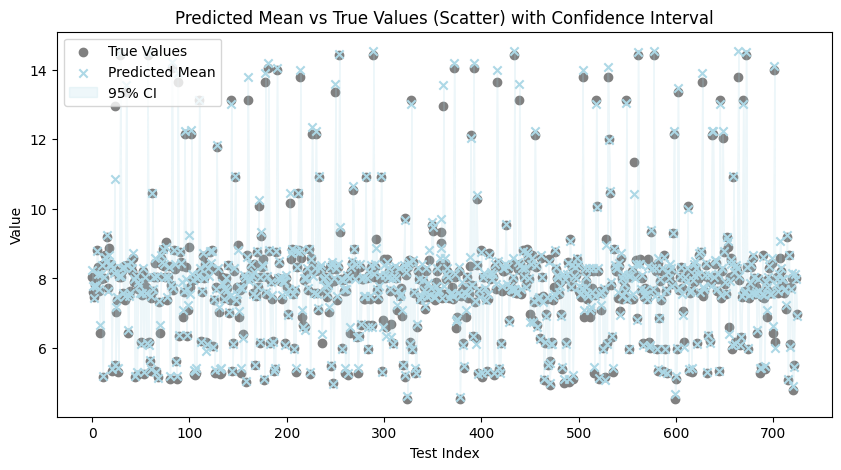

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Flattened arrays (1D)
# y_true_flat = ...
# pred_mu_flat = ...
# pred_sigma_flat = ...
# time_axis = np.arange(len(y_true_flat))  # or an actual index of length = number of test samples

ci_multiplier = 1.96
lower = pred_mu_flat - ci_multiplier * pred_sigma_flat
upper = pred_mu_flat + ci_multiplier * pred_sigma_flat

plt.figure(figsize=(10, 5))

# Plot the true values as scatter points
plt.scatter(time_axis, y_true_flat, label='True Values', color='gray', marker='o')

# Plot the predicted means as scatter points
plt.scatter(time_axis, pred_mu_flat, label='Predicted Mean', color='lightblue', marker='x')

# Fill the confidence interval around the predicted mean
plt.fill_between(
    time_axis, 
    lower, 
    upper, 
    color='lightblue', 
    alpha=0.2, 
    label='95% CI'
)

plt.title("Predicted Mean vs True Values (Scatter) with Confidence Interval")
plt.xlabel("Test Index")
plt.ylabel("Value")
plt.legend()
plt.show()


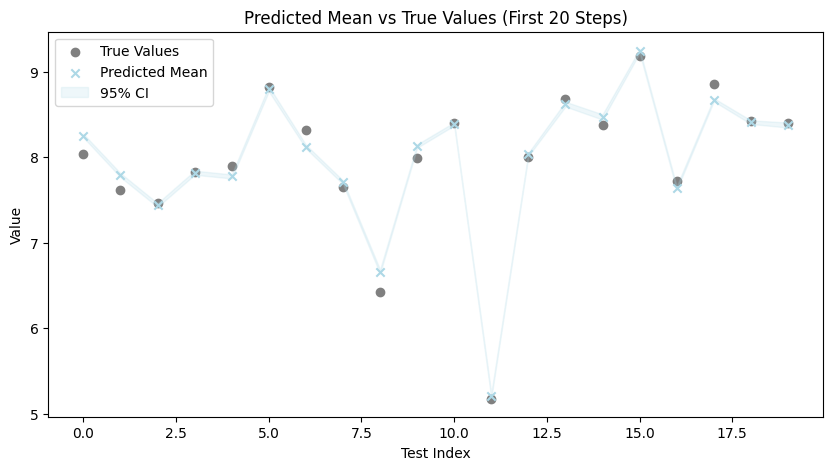

In [11]:
# Suppose you have:
#   time_axis (shape: (num_test,)) 
#   y_true_flat (shape: (num_test,)) 
#   pred_mu_flat (shape: (num_test,)) 
#   pred_sigma_flat (shape: (num_test,))

# 1) Choose how many points you want to plot
num_points_to_plot = 20

# 2) Subset everything to the first 20 steps
time_axis_subset = time_axis[:num_points_to_plot]
y_true_subset = y_true_flat[:num_points_to_plot]
pred_mu_subset = pred_mu_flat[:num_points_to_plot]
pred_sigma_subset = pred_sigma_flat[:num_points_to_plot]

# 3) Compute confidence intervals (if needed)
ci_multiplier = 1.96
lower = pred_mu_subset - ci_multiplier * pred_sigma_subset
upper = pred_mu_subset + ci_multiplier * pred_sigma_subset

# 4) Plot 
plt.figure(figsize=(10, 5))
plt.scatter(time_axis_subset, y_true_subset, label='True Values', color='gray', marker='o')
plt.scatter(time_axis_subset, pred_mu_subset, label='Predicted Mean', color='lightblue', marker='x')
plt.fill_between(time_axis_subset, lower, upper, color='lightblue', alpha=0.2, label='95% CI')
plt.title("Predicted Mean vs True Values (First 20 Steps)")
plt.xlabel("Test Index")
plt.ylabel("Value")
plt.legend()
plt.show()


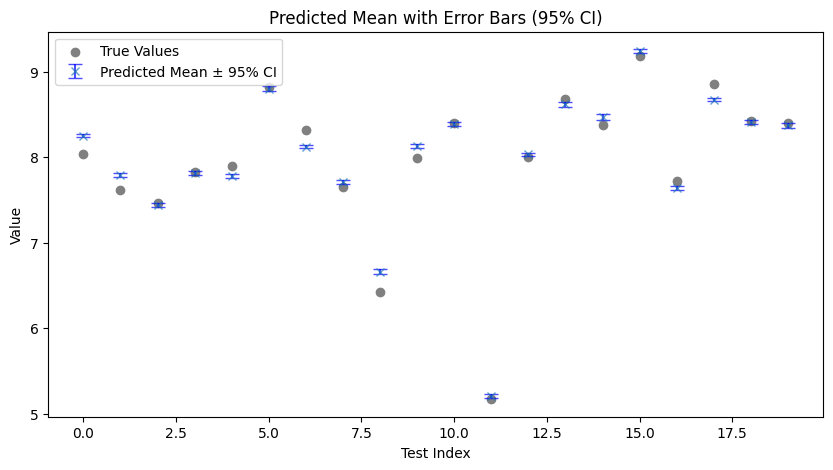

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose we have the following arrays (1D):
# time_axis, y_true_flat, pred_mu_flat, pred_sigma_flat
# We'll slice them to get the first 20 points for demonstration:
num_points_to_plot = 20
time_axis_subset = time_axis[:num_points_to_plot]
y_true_subset = y_true_flat[:num_points_to_plot]
pred_mu_subset = pred_mu_flat[:num_points_to_plot]
pred_sigma_subset = pred_sigma_flat[:num_points_to_plot]

# CI multiplier for ~95%
ci_multiplier = 1.96
ci_values = ci_multiplier * pred_sigma_subset  # half-width of the CI around each point

# Create a figure
plt.figure(figsize=(10, 5))

# Plot the true values as scatter points
plt.scatter(time_axis_subset, y_true_subset, color='gray', marker='o', label='True Values')

# Plot predicted means with error bars for the confidence interval
# fmt='x' means a cross marker for each predicted point
# yerr expects the "distance" above and below each point
plt.errorbar(
    time_axis_subset,
    pred_mu_subset,
    yerr=ci_values,
    fmt='x',                # marker style
    ecolor='blue',          # color of error bars
    capsize=5,              # length of the error bar caps
    elinewidth=1.5,
    alpha=0.7,
    label='Predicted Mean ± 95% CI'
)

plt.title("Predicted Mean with Error Bars (95% CI)")
plt.xlabel("Test Index")
plt.ylabel("Value")
plt.legend()
plt.show()
